In [1]:
#Filename: Clean_Candidates_Data.ipynb
#Description: Load in candidates.csv and set up for analysis

In [67]:
#import necessary packages
import numpy as np
import pandas as pd
import datetime
from sklearn import decomposition
from sklearn import datasets
import matplotlib.pyplot as plt
import mglearn
import mca

In [3]:
#load data

#Candidate Data
#candidates = pd.read_csv("candidates.csv")
mrs = pd.read_csv("mostRecentStatus.csv")

In [4]:
mrs.columns

Index(['is_placed', 'in_process', 'status_name', 'job_id', 'title',
       'joborder_status', 'client_id', 'name', 'status_id', 'date_submitted',
       'is_rockstar', 'status_name.1', 'status_html', 'candidate_id', 'fname',
       'lname', 'nname', 'gender', 'minority', 'ivy', 'recruiter_id',
       'date_created', 'email', 'altemail', 'consulting', 'permanent', 'phone',
       'address', 'address_field', 'zip', 'source_id', 'source_notes',
       'clarity', 'personability', 'year_began', 'i9', 'i9notes',
       'h1b_entry_date', 'star', 'looking_status', 'recruiter_id2',
       'recruiter_id3', 'fullname', 'recruiter_name', 'accman_name',
       'willingToRelocate', 'source_id.1', 'sourceName', 'functionalCategory',
       'functionalCat_id', 'technicalCategory', 'technicalCat_id',
       'mainCategory', 'mainCat_id'],
      dtype='object')

In [5]:
#drop variables that don't appear relevant
# "middleName": mostly null
# "nickName": mostly null
# "linkedInURL": mostly null
# "address": won't be using candidate address
# "sourceNotes: mostly null
'''
toDrop = ['middleName', 'nickName', 'linkedInUrl', 'address', 'sourceNotes']
candidates = candidates.drop(toDrop, axis = 1)
'''
#Preprocessing drop
#Merge address and address_field
toDropMRS = ['nname', 'altemail', 'phone', 'job_id', 'joborder_status', 'status_html', 'fullname', 'recruiter_name',
             'accman_name', 'name', 'source_notes', 'i9notes', 'h1b_entry_date', 'star', 'looking_status',
             'recruiter_id2', 'recruiter_id3','source_id.1', 'status_name.1', 'address', 'address_field']
for col in toDropMRS:
    if(col in mrs.columns):
        mrs = mrs.drop(col,1)

mrs.columns

Index(['is_placed', 'in_process', 'status_name', 'title', 'client_id',
       'status_id', 'date_submitted', 'is_rockstar', 'candidate_id', 'fname',
       'lname', 'gender', 'minority', 'ivy', 'recruiter_id', 'date_created',
       'email', 'consulting', 'permanent', 'zip', 'source_id', 'clarity',
       'personability', 'year_began', 'i9', 'willingToRelocate', 'sourceName',
       'functionalCategory', 'functionalCat_id', 'technicalCategory',
       'technicalCat_id', 'mainCategory', 'mainCat_id'],
      dtype='object')

In [6]:
#Clean email
#To Ryan: Should we try to extract the domain as an potential features? Are "gmail" users different "aol"

#To Do
mrs["is_gmail"] = (1*(mrs["email"].str.contains("@gmail", na=False)))
mrs["is_aol"] = (1*(mrs["email"].str.contains("@aol", na=False)))
mrs["is_custom"] = (1*(~mrs["email"].str.contains("@gmail|@aol", na=False)))
print(mrs["is_gmail"].value_counts())
print(mrs["is_aol"].value_counts())
print(mrs["is_custom"].value_counts())


#drop email in group later

1    15570
0     5377
Name: is_gmail, dtype: int64
0    20902
1       45
Name: is_aol, dtype: int64
0    15615
1     5332
Name: is_custom, dtype: int64


In [7]:
#Clean gender
#To Ryan: Looks like all the candidates are men...is this the full sample?
mrs["is_male"] = (1*(mrs["gender"] == "Male"))
mrs.is_male.value_counts()

#drop gender in group later

1    18354
0     2593
Name: is_male, dtype: int64

In [8]:
#Clean isMinority
#To Ryan: What do these values mean again?
mrs["is_minority"] = (1*(mrs["minority"] == "on"))
mrs.is_minority.value_counts()

#drop minority in group later

0    19902
1     1045
Name: is_minority, dtype: int64

In [9]:
#Clean isIvy
#To Ryan: What do these values mean again?
mrs["is_ivy"] = (1*(mrs["ivy"] == "on"))
mrs.is_ivy.value_counts()

#drop ivy in group later

0    15812
1     5135
Name: is_ivy, dtype: int64

In [75]:
#Clean recruiterId
#Nothing more to do

#candidates.recruiterId.value_counts()

In [76]:
#Clean candidateCreationDate
#Nothing here to do

#print(mrs.candidateCreationDate[0:10])

In [77]:
#Clean zip
#Nothing to do here?

#To Do

In [10]:
#Clean isWillingRelocate
#To Ryan: What do the "-1" mean?
#mrs["is_ivy"] = (1*(mrs["ivy"] == "on"))
#mrs.is_ivy.value_counts()
mrs.willingToRelocate.value_counts()
#candidates.isWillingRelocate.value_counts()

1    13064
0     7883
Name: willingToRelocate, dtype: int64

In [11]:
#Clean sourceId
#What is this feature?
#Source where candidate originated from. Look in data for source names

mrs.source_id.value_counts()

5      16732
7       1560
8       1279
6        406
4        265
303      263
1        120
3        101
304       92
9         66
306       27
305       20
35        14
12         1
2          1
Name: source_id, dtype: int64

In [12]:
#Clean yearBeganExperience
#Use the difference between when the candidate was inputted into the database and "yearBeganExperience"
#Created "yearsOfExp"C
nowYear = datetime.datetime.now().year
mrs['yearsOfExp'] = nowYear-mrs['year_began']

#drop year_began later

In [13]:
#Clean i9
#To Ryan: Should create dummies from this? Does USC-GC mean US Citizen?
mrs["is_citizen"] = (1*(mrs["i9"].str.contains("Eligible|U.S. Citizen", na=False)))

print(mrs.i9.value_counts())
mrs.is_citizen.value_counts()

#drop i9 later


Eligible(USC-GC)    11142
H1B Visa             6799
Unknown              1190
Other                 861
TN Visaa              650
EAD                   294
U.S. Citizen            2
Name: i9, dtype: int64


1    11144
0     9803
Name: is_citizen, dtype: int64

In [14]:
#Need to clean the bottom features

#Create Dummies for Functional Category
#Also the total functional categories

mrs[['func1', 'func2', 'func3', 'func4', 'func5', 'func6', 'func7']] = mrs['functionalCat_id'].str.split(',', expand = True)
dummies = pd.get_dummies(mrs[['func1', 'func2', 'func3', 'func4', 'func5', 'func6', 'func7']])
dummies = dummies.groupby(dummies.columns.str.split("_").str[1],axis=1).sum()
dummies['total'] = dummies.sum(axis=1)
dummies = dummies.rename(columns = lambda x : 'func_' + x)
mrs = mrs.drop(['functionalCat_id', 'functionalCategory','func1', 'func2', 'func3', 'func4', 'func5', 'func6', 'func7'], axis = 1)
mrs = pd.concat([mrs, dummies], axis=1, join='inner')
mrs.columns

#techCatName
#techCatId
mrs[['tech1', 'tech2', 'tech3', 'tech4', 'tech5', 'tech6', 'tech7', 'tech8']] = \
mrs['technicalCat_id'].str.split(',', expand = True)
dummies = pd.get_dummies(mrs[['tech1', 'tech2', 'tech3', 'tech4', 'tech5', 'tech6', 'tech7', 'tech8']])
dummies = dummies.groupby(dummies.columns.str.split("_").str[1],axis=1).sum()
dummies['total'] = dummies.sum(axis=1)
dummies = dummies.rename(columns = lambda x : 'tech_' + x)
mrs = mrs.drop(['technicalCat_id', 'technicalCategory','tech1', 'tech2', 'tech3', 'tech4', 'tech5', 'tech6', 'tech7', 'tech8'], axis = 1)
mrs = pd.concat([mrs, dummies], axis=1, join='inner')
mrs.columns


#mainCatName
#mainCatId

mrs[['main1', 'main2', 'main3', 'main4']] = mrs['mainCat_id'].str.split(',', expand = True)
dummies = pd.get_dummies(mrs[['main1', 'main2', 'main3', 'main4']])
dummies = dummies.groupby(dummies.columns.str.split("_").str[1],axis=1).sum()
dummies['total'] = dummies.sum(axis=1)
dummies = dummies.rename(columns = lambda x : 'main_' + x)
mrs = mrs.drop(['mainCat_id', 'mainCategory','main1', 'main2', 'main3', 'main4'], axis = 1)
mrs = pd.concat([mrs, dummies], axis=1, join='inner')


#categorys = ['functionalCategory', 'functionalCat_id', 'technicalCategory', 'technicalCat_id',
#       'mainCategory', 'mainCat_id' ]
#for col in categorys:
#    if(col in mrs.columns):
#        mrs = mrs.drop(col,1)
#These all formatted as such value, [another value, another value]
#For both Ids and Name. Have to decide how we're going to use it

In [15]:
postProcessDrop = ['i9', 'year_began', 'ivy', 'minority', 'gender', 'email',
                   'clarity', 'personability', 'status_name']


strings = ['status_name', 'title', 'date_submitted', 'fname', 'lname', 'sourceName', 'gender', 'date_created', 'i9',
          'email', 'address', 'minority', 'ivy','address_field','clarity','personability','zip']

for col in postProcessDrop:
    if(col in mrs.columns):
        mrs = mrs.drop(col,1)
        
for col in strings:
    if(col in mrs.columns):
        mrs = mrs.drop(col,1)
allCol=mrs.columns


In [16]:
mrs['yearsOfExp'].fillna(value=0, inplace=True)
Possible_values = {col: mrs[col].isnull().sum() for col in mrs.columns}
Possible_values

{'candidate_id': 0,
 'client_id': 0,
 'consulting': 0,
 'func_1': 0,
 'func_10': 0,
 'func_11': 0,
 'func_12': 0,
 'func_13': 0,
 'func_14': 0,
 'func_15': 0,
 'func_16': 0,
 'func_17': 0,
 'func_18': 0,
 'func_19': 0,
 'func_20': 0,
 'func_21': 0,
 'func_22': 0,
 'func_23': 0,
 'func_24': 0,
 'func_25': 0,
 'func_26': 0,
 'func_27': 0,
 'func_28': 0,
 'func_29': 0,
 'func_3': 0,
 'func_30': 0,
 'func_31': 0,
 'func_32': 0,
 'func_33': 0,
 'func_34': 0,
 'func_35': 0,
 'func_36': 0,
 'func_37': 0,
 'func_38': 0,
 'func_39': 0,
 'func_4': 0,
 'func_41': 0,
 'func_42': 0,
 'func_45': 0,
 'func_49': 0,
 'func_5': 0,
 'func_52': 0,
 'func_54': 0,
 'func_59': 0,
 'func_6': 0,
 'func_63': 0,
 'func_64': 0,
 'func_65': 0,
 'func_66': 0,
 'func_67': 0,
 'func_68': 0,
 'func_7': 0,
 'func_8': 0,
 'func_9': 0,
 'func_total': 0,
 'in_process': 0,
 'is_aol': 0,
 'is_citizen': 0,
 'is_custom': 0,
 'is_gmail': 0,
 'is_ivy': 0,
 'is_male': 0,
 'is_minority': 0,
 'is_placed': 0,
 'is_rockstar': 0,
 'm

In [18]:
#Train and Test data split
train_split = 0.7
train = mrs.sample(frac=train_split)
print ("Train dataset info:\n", train.is_placed.value_counts())
test = mrs.loc[~mrs.index.isin(train.index)]
print ("Test dataset info:\n", test.is_placed.value_counts())

train.to_csv("cleaned_mostRecStat_train.csv",index=False)
test.to_csv("cleaned_mostRecStat_test.csv",index=False)

Train dataset info:
 0    14527
1      136
Name: is_placed, dtype: int64
Test dataset info:
 0    6221
1      63
Name: is_placed, dtype: int64


In [59]:
#further items to drop

toDrop = ['client_id', 'candidate_id', 'recruiter_id', 'source_id', 'in_process']
for col in toDrop:
    if(col in mrs.columns):
        mrs = mrs.drop(col,1)

mrs.columns

Index(['is_placed', 'status_id', 'is_rockstar', 'consulting', 'permanent',
       'willingToRelocate', 'is_gmail', 'is_aol', 'is_custom', 'is_male',
       ...
       'tech_8', 'tech_9', 'tech_total', 'main_1', 'main_16', 'main_2',
       'main_3', 'main_4', 'main_5', 'main_total'],
      dtype='object', length=111)

In [76]:
y = mrs[['is_placed']]
#X = mrs.drop(['is_placed'], axis=1)
X = mrs[['is_rockstar', 'is_male', 'yearsOfExp', 'tech_total', 'main_total', 'func_total']]
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X_pca = pca.transform(X)

Original shape: (20947, 6)
Reduced shape: (20947, 3)
PCA component shape: (3, 6)
PCA components:
[[ -2.32622222e-06   1.06743766e-06  -1.00000000e+00  -7.86446003e-06
   -7.41784228e-08  -4.92848546e-06]
 [  9.47791776e-04   1.93467281e-02  -8.50682723e-06   9.87996085e-01
    5.88148213e-03   1.53146822e-01]
 [  2.52374147e-01   3.24890867e-02  -4.08996567e-06  -1.49059115e-01
    1.38377237e-02   9.55427468e-01]]


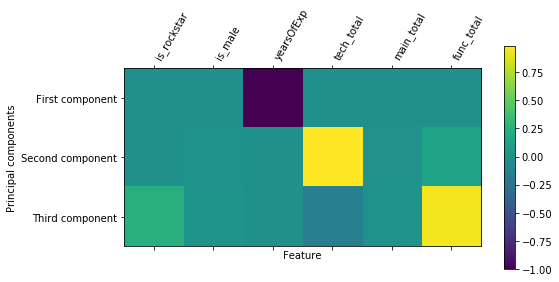

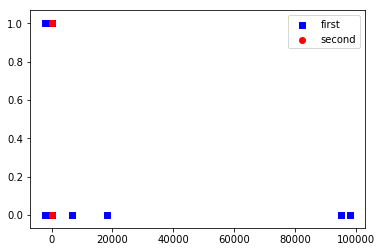

In [87]:
print("Original shape: {}".format(str(X.shape))) 
print("Reduced shape: {}".format(str(X_pca.shape)))

print("PCA component shape: {}".format(pca.components_.shape))
print("PCA components:\n{}".format(pca.components_))


plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1, 2], ["First component", "Second component", "Third component"])
plt.colorbar()
plt.xticks(range(len(list(X))),
           list(X), rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")
plt.show()

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(X_pca[:,0], y, c='b', marker="s", label='first')
ax1.scatter(X_pca[:,1], y, c='r', marker="o", label='second')
plt.legend(loc='upper right');
plt.show()

#plt.figure(figsize=(8, 8))
#mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], y)
#plt.legend(cancer.target_names, loc="best")
#plt.gca().set_aspect("equal")
#plt.xlabel("First principal component")
#plt.ylabel("Second principal component")

In [24]:
print(pca.explained_variance_ratio_) 

[  9.99980054e-01   1.69014702e-05   5.65282550e-07]


In [26]:
print(pca.explained_variance_)  

[  1.34565873e+06   2.27440645e+01   7.60692570e-01]


FA components:
[[ -2.69847740e-03   1.23825489e-03  -1.16002488e+03  -9.12297512e-03
   -8.60489736e-05  -5.71717088e-03]
 [  1.20120440e-02   2.44779054e-02  -1.20842555e-05   3.60206979e-01
    1.26017900e-02   2.12288183e-01]
 [  3.27173391e-02  -4.51586192e-03  -3.50802526e-07  -1.25443671e-01
    8.74048994e-03   5.86433381e-02]]


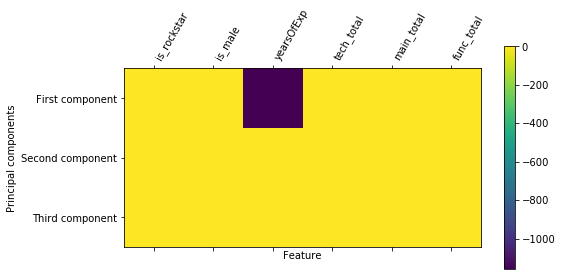

In [83]:
fa = decomposition.FactorAnalysis(n_components=3)
fa.fit(X)
print("FA components:\n{}".format(fa.components_))


plt.matshow(fa.components_, cmap='viridis')
plt.yticks([0, 1, 2], ["First component", "Second component", "Third component"])
plt.colorbar()
plt.xticks(range(len(list(X))),
           list(X), rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")
plt.show()